In [1]:
import sys
import numpy as np
from scipy.stats import spearmanr
sys.path.insert(0,'..')
from datastore import DataStore
from targeting import *

In [5]:
# GENERATION OF TARGETING SYNTHETIC DATA
np.random.seed(2)
n_rows = 1000
n_proxies = 10
df = pd.DataFrame()
df['unique_id'] = range(n_rows)
df['consumption'] = np.random.rand(n_rows)*10
for proxy in range(n_proxies):
    df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
df['weight'] = np.random.randint(10, 100, size=n_rows)
# df.to_csv('../synthetic_data/targeting.csv', index=False)

In [3]:
datastore = DataStore('../configs/config.yml')
targeting = Targeting(datastore=datastore)

In [6]:
# Tests for pearson and spearman
for proxy in range(n_proxies):
    
    cider_pearson = round(targeting.pearson('consumption', 'proxy' + str(proxy), weighted=False), 2)
    raw_pearson = round(np.corrcoef(df['consumption'], df['proxy' + str(proxy)])[0][1], 2)
    assert cider_pearson == raw_pearson
    
    cider_spearman = round(targeting.spearman('consumption', 'proxy' + str(proxy), weighted=False), 2)
    raw_spearman = round(spearmanr(df['consumption'], df['proxy' + str(proxy)])[0], 2)
    assert cider_pearson == raw_pearson

In [7]:
targeting.targeting_table('consumption', ['proxy' + str(i) for i in range(n_proxies)], 50, 20)

,Targeting Method,Pearson,Spearman,AUC (Threshold-Agnostic),Accuracy,Precision,Recall,AUC (Threshold-Specific)
0,proxy0,0.896946,0.902278,0.906109,0.700,1.000,0.400,0.961700
1,proxy1,0.853370,0.856880,0.882319,0.700,1.000,0.400,0.925204
2,proxy2,0.816323,0.818275,0.869501,0.698,0.995,0.398,0.921336
3,proxy3,0.775243,0.772671,0.846071,0.688,0.970,0.388,0.886284
4,proxy4,0.731196,0.724984,0.817799,0.680,0.950,0.380,0.866024
5,proxy5,0.678394,0.668772,0.795040,0.664,0.910,0.364,0.837696
6,proxy6,0.667771,0.654586,0.797962,0.666,0.915,0.366,0.827704
7,proxy7,0.656857,0.641081,0.796843,0.662,0.905,0.362,0.824360
8,proxy8,0.589269,0.566338,0.760134,0.646,0.865,0.346,0.781372
9,proxy9,0.581469,0.558431,0.755707,0.640,0.850,0.340,0.762556


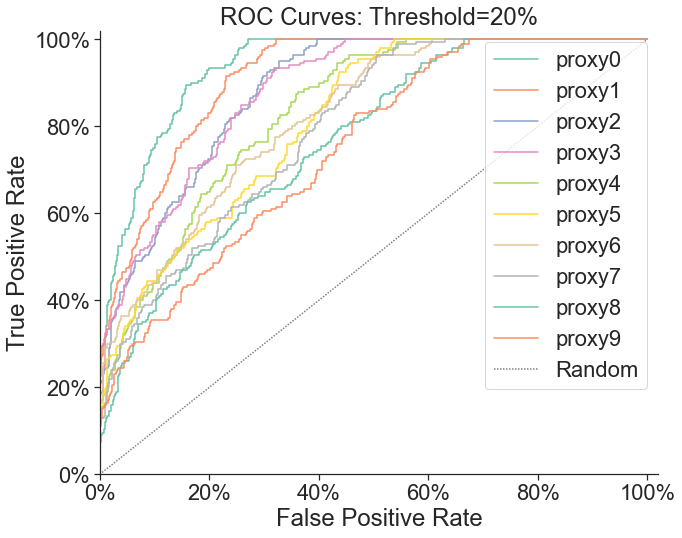

In [8]:
targeting.roc_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], p=20, weighted=False)

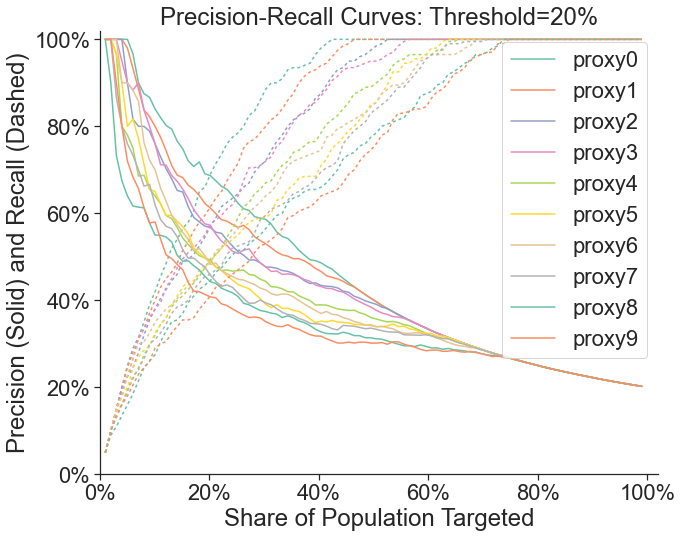

In [9]:
targeting.precision_recall_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], p=20,
                                  weighted=False)

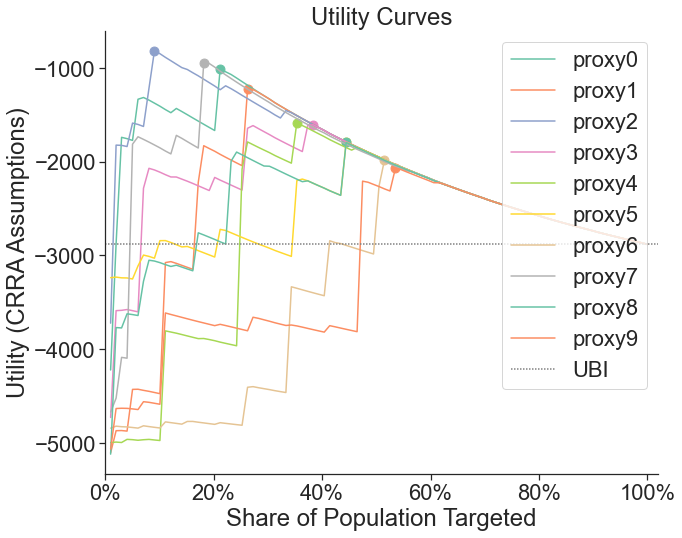

In [10]:
targeting.utility_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], .01, weighted=False)

In [11]:
targeting.utility_table('consumption', ['proxy' + str(i) for i in range(n_proxies)], .01, weighted=False)

,Proxy,Optimal Share of Population Targeted,Maximum Utility,Optimal Transfer Size
0,proxy0,21.204082,-1011.750798,0.047170
1,proxy1,26.255102,-1225.954439,0.038168
2,proxy2,9.081633,-817.080667,0.111111
3,proxy3,38.377551,-1606.065329,0.026110
4,proxy4,35.346939,-1582.812099,0.028329
5,proxy5,44.438776,-1793.536727,0.022523
6,proxy6,51.510204,-1981.561858,0.019417
7,proxy7,18.173469,-946.588076,0.055249
8,proxy8,44.438776,-1794.153093,0.022523
9,proxy9,53.530612,-2069.128099,0.018692
